### Note: All 3 outputs where made in this file (KNN, SVM, RF), though it is a little messy. At the top is the modified KNN starter code that when run gets an accuracy of 53%

### After that is the training and testing cell for SVM and RF

# Libraries

In [1]:
import pickle
import pandas as pd
import seaborn as sns
from os.path import exists
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Loading the Files

Download the csv files into the `data/` directory.

train.csv shape is  (1697533, 9)
test.csv shape is  (212192, 2)

        Id   ProductId          UserId  HelpfulnessNumerator  \
0   914403  B0009W5KHM   AV6QDP8Q0ONK4                     2   
1   354887  6303079709  A2I8RXJN80A2D2                     0   
2  1407653  B004H0M2XC  A3FHV3RV8Z12E6                     0   
3  1377458  B003ZJ9536  A12VLTA3ZHVPUY                     1   
4   475323  630574453X  A13NM1PES9OXVN                     2   

   HelpfulnessDenominator        Time  \
0                       2  1341014400   
1                       0  1168819200   
2                       0  1386201600   
3                       1  1348704000   
4                       3   970012800   

                                         Summary  \
0                                  GOOD FUN FILM   
1                                   Movie Review   
2             When is it a good time to Consent?   
3                                          TRUTH   
4  Intelligent and bittersweet -- stays wit

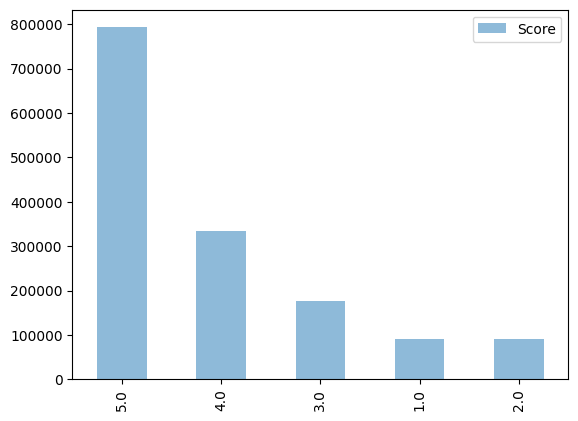


EVERYTHING IS PROPERLY SET UP! YOU ARE READY TO START


In [2]:
trainingSet = pd.read_csv("train.csv")
testingSet = pd.read_csv("test.csv")

print("train.csv shape is ", trainingSet.shape)
print("test.csv shape is ", testingSet.shape)

print()

print(trainingSet.head())
print()
print(testingSet.head())

print()

print(trainingSet.describe())

trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.show()

print()
print("EVERYTHING IS PROPERLY SET UP! YOU ARE READY TO START")

In [15]:
star_counts = dict(trainingSet['Score'].value_counts())
print(star_counts)
print(star_counts[5]+star_counts[4]+star_counts[3]+star_counts[2]+star_counts[1])
ratios = [star_counts[5]/1485341, star_counts[4] / 1485341,
        star_counts[3]/1485341, star_counts[2]/1485341, star_counts[1]/1485341]

print(ratios)

{5.0: 793163, 4.0: 335228, 3.0: 176082, 1.0: 91190, 2.0: 89678}
1485341
[0.5339938775001835, 0.22569093561680448, 0.11854651558127056, 0.06037536161729865, 0.06139330968444283]


# Adding Features

In [69]:
def add_features_to(df):
    # This is where you can do all your feature extraction

    df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
    df['Helpfulness'] = df['Helpfulness'].fillna(0)

    return df

# Load the feature extracted files if they've already been generated
if exists('./data/X_train.csv'):
    X_train = pd.read_csv("./data/X_train.csv")
if exists('./data/X_submission.csv'):
    X_submission = pd.read_csv("./data/X_submission.csv")

else:
    # Process the DataFrame
    train = add_features_to(trainingSet)

    # Merge on Id so that the submission set can have feature columns as well
    X_submission = pd.merge(train, testingSet, left_on='Id', right_on='Id')
    X_submission = X_submission.drop(columns=['Score_x'])
    X_submission = X_submission.rename(columns={'Score_y': 'Score'})

    # The training set is where the score is not null
    X_train =  train[train['Score'].notnull()]

    X_submission.to_csv("./data/X_submission.csv", index=False)
    X_train.to_csv("./data/X_train.csv", index=False)

# Sample + Split into training and testing set

In [70]:
# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
    X_train.drop(columns=['Score']),
    X_train['Score'],
    test_size=1/4.0,
    random_state=0
)




# Feature Selection

In [71]:
features = ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'Helpfulness']

X_train_select = X_train[features]
X_test_select = X_test[features]
X_submission_select = X_submission[features]

# Model Creation

In [72]:
# Learn the model
model = KNeighborsClassifier(n_neighbors=10000).fit(X_train_select, Y_train)

# Predict the score using the model
Y_test_predictions = model.predict(X_test_select)

# Model Evaluation

Accuracy on testing set =  0.5333256134605856


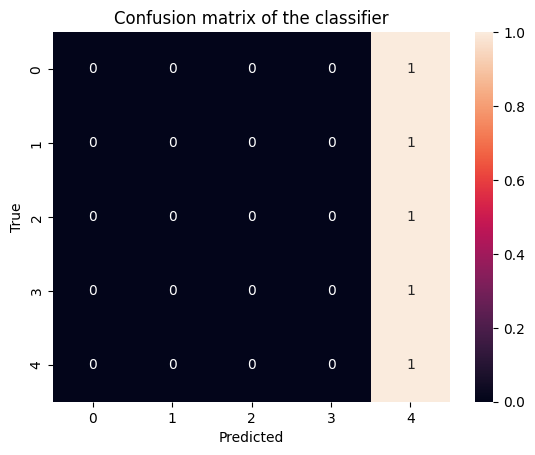

In [73]:
# Evaluate your model on the testing set
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))

# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Create submission file

In [74]:
# Create the submission file
X_submission['Score'] = model.predict(X_submission_select)
submission = X_submission[['Id', 'Score']]
submission.to_csv("./data/submission.csv", index=False)
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [24]:

import numpy as np

def assign_scores(csv_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Define the scores and their associated probabilities
    scores = [5.0, 4.0, 3.0, 2.0, 1.0]
    probabilities = [0.5339938775001835, 0.22569093561680448, 
                    0.11854651558127056, 0.06037536161729865, 
                    0.06139330968444283]
    
    # Assign scores based on the defined probabilities
    df['Score'] = np.random.choice(scores, size=len(df), p=probabilities)
    
    return df

# Example usage
result_df = assign_scores('./data/submission.csv')
print(result_df)
result_df.to_csv("./data/submission.csv", index=False)


             Id  Score
0       1323432    1.0
1       1137299    5.0
2       1459366    1.0
3        931601    4.0
4       1311995    5.0
...         ...    ...
212187   510697    5.0
212188   230001    3.0
212189  1346402    5.0
212190   695280    4.0
212191  1371294    5.0

[212192 rows x 2 columns]


# Implamenting SVM and RF Models

In [3]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Linear SVM
from sklearn.svm import LinearSVC  
from sklearn.metrics import classification_report, accuracy_score
# For handling class imbalance
from imblearn.over_sampling import SMOTE  

# Ensuring necessary NLTK resources installed (avoid error in lecture)
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Removing punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenization
    tokens = text.split()
    # Removing stop words and lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Training set preparation
train_short = trainingSet[["UserId", "Text", "Score"]]
train_short_cleaned = train_short.dropna(subset=["Score", "Text"])
train_short_cleaned = train_short_cleaned[:20000]

# Apply preprocessing to the 'Text' column
train_short_cleaned['Text'] = train_short_cleaned['Text'].apply(preprocess_text)

# Feature extraction with bigrams
tfidf = TfidfVectorizer(max_features=15000, analyzer='char', ngram_range=(1, 2))
X = tfidf.fit_transform(train_short_cleaned["Text"])
y = train_short_cleaned["Score"]


# Handling class imbalance
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, 
    y_resampled, 
    test_size=0.2, 
    random_state=0
    )

# Hyperparameter tuning for Linear SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'class_weight': ['balanced', None]
}
svm_grid_search = GridSearchCV(LinearSVC(), svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)

# Best model from grid search
best_svm_clf = svm_grid_search.best_estimator_

# Fit and evaluate the best Linear SVM model
best_svm_clf.fit(X_train, y_train)
y_pred_svm = best_svm_clf.predict(X_test)

# Performance of Linear SVM
print("Best Linear SVM Performance:")
print(classification_report(y_test, y_pred_svm))
print("\nAccuracy: ", accuracy_score(y_test, y_pred_svm))

# Using Random Forest as an alternative model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=0)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest model
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("\nAccuracy: ", accuracy_score(y_test, y_pred_rf))


[nltk_data] Downloading package stopwords to /Users/chimp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/chimp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning

Best Linear SVM Performance:
              precision    recall  f1-score   support

         1.0       0.71      0.79      0.74      2105
         2.0       0.60      0.72      0.66      2109
         3.0       0.55      0.60      0.58      2167
         4.0       0.53      0.36      0.43      2126
         5.0       0.58      0.54      0.56      2109

    accuracy                           0.60     10616
   macro avg       0.59      0.60      0.59     10616
weighted avg       0.59      0.60      0.59     10616


Accuracy:  0.6001318764129616
Random Forest Performance:
              precision    recall  f1-score   support

         1.0       0.98      0.92      0.95      2105
         2.0       0.99      0.90      0.94      2109
         3.0       0.94      0.80      0.86      2167
         4.0       0.78      0.67      0.72      2126
         5.0       0.58      0.84      0.69      2109

    accuracy                           0.83     10616
   macro avg       0.85      0.83      0.83 

In [65]:
# Now that the model is created, run it on test.csv

# Get df containing the reviews that test.csv asks for with all feature columns
X_submission = pd.merge(trainingSet, testingSet, left_on='Id', right_on='Id')

# Before testing with the model, turn nan to ""
empties = X_submission.index[pd.isna(X_submission['Text'])].tolist()
for i in empties:
    X_submission.at[i,"Text"] = ""

# Vectorize the text to use in model (about 1 min)
new = tfidf.transform(X_submission["Text"])

#Spooky0 = best_svm_clf.predict(X_new)
y_test_prediction = rf_model.predict(new)

a1 = X_submission["Id"].to_numpy()
a2 = y_test_prediction
test = pd.DataFrame()
test['Id'] = pd.Series(a1)
test['Score'] = pd.Series(a2)
test.to_csv("./data/submission.csv", index=False)



In [68]:
# Seperated out so that you do not need to rerun the tfidf when switching between svm and rf

y_test_prediction = best_svm_clf.predict(new)
#y_test_prediction = rf_model.predict(new)

a1 = X_submission["Id"].to_numpy()
a2 = y_test_prediction
test = pd.DataFrame()
test['Id'] = pd.Series(a1)
test['Score'] = pd.Series(a2)
test.to_csv("./data/submission.csv", index=False)


In [19]:
# Here you can test the models on your own custom review text!

new_text = []
new_text2 = []
X_new = tfidf.transform(new_text2)
Spooky0 = best_svm_clf.predict(X_new)
Spooky = rf_model.predict(X_new)
print(Spooky0, "\n", Spooky)

[1. 3. 5.] 
 [5. 3. 5.]
